In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score,classification_report
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv(r'C:\Users\rajic\OneDrive\Documents\contest\Dataset\Train.csv')

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
test=pd.read_csv(r'C:\Users\rajic\OneDrive\Documents\contest\Dataset\Test.csv')

In [5]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [6]:
print(train.isna().sum())
print(test.isna().sum())

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64
INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64


In [7]:
train["X_12"].fillna(train["X_12"].median(),inplace=True)
test["X_12"].fillna(test["X_12"].median(),inplace=True)

In [8]:
print(train.isna().sum())
print(test.isna().sum())

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64
INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64


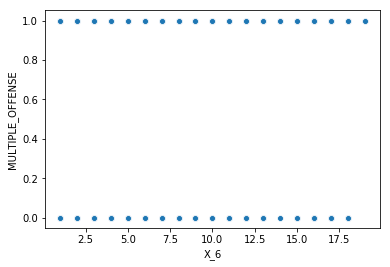

In [9]:
ax=sns.scatterplot(x="X_6", y="MULTIPLE_OFFENSE", data=train)

In [ ]:
col = train.columns
sns.pairplot( train[col]  ,height = 2.5)

In [9]:
train.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [10]:
x=['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15']

In [11]:
l=[]
from scipy import stats
for i in x:
    statistic,p,dof,freq=stats.chi2_contingency(pd.crosstab(train[i],train['MULTIPLE_OFFENSE']))
    prob=0.90
    alpha=1-prob
    critical=stats.chi2.ppf(prob,dof)
    if abs(statistic)>=critical:
        l.append(i)
        print(i,":dependant")
    else:
        print(i,":independant")
    if p<=alpha:
        print(i,":dependant")
    else:
        print(i,":independent")   
l

INCIDENT_ID :independant
INCIDENT_ID :independent
DATE :independant
DATE :independent
X_1 :dependant
X_1 :dependant
X_2 :dependant
X_2 :dependant
X_3 :dependant
X_3 :dependant
X_4 :independant
X_4 :independent
X_5 :independant
X_5 :independent
X_6 :dependant
X_6 :dependant
X_7 :dependant
X_7 :dependant
X_8 :dependant
X_8 :dependant
X_9 :dependant
X_9 :dependant
X_10 :dependant
X_10 :dependant
X_11 :dependant
X_11 :dependant
X_12 :dependant
X_12 :dependant
X_13 :dependant
X_13 :dependant
X_14 :dependant
X_14 :dependant
X_15 :dependant
X_15 :dependant


['X_1',
 'X_2',
 'X_3',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15']

In [12]:
df=pd.DataFrame(test["INCIDENT_ID"])

In [13]:
train=train.drop(columns=['INCIDENT_ID','DATE','X_4','X_5'])

In [14]:
test=test.drop(columns=['INCIDENT_ID','DATE','X_4','X_5'])

In [16]:
train.head()

,X_1,X_2,X_3,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,-0.336025,0.735489,0.618612,-0.258109,0.289422,0.018953,0.789575,-0.218714,-0.354230,0.022126,0.245052,-1.008728,0.302296,-4.619208
1,0.358561,0.801107,0.816831,1.083674,3.123123,0.018953,0.789575,-0.218714,0.312212,0.022126,0.643651,1.601188,0.063822,0.216487
2,-0.336025,-1.429877,-1.495724,-1.152631,-1.256233,0.707130,-1.412105,-0.218714,-0.354230,0.022126,0.897305,0.469455,0.063822,0.216487
3,-0.336025,0.538638,0.486466,0.189152,-0.998624,0.018953,0.789575,-0.218714,0.451949,0.022126,-0.479674,-1.008728,0.063822,0.216487
4,-0.336025,0.538638,0.486466,0.412783,-0.483406,-0.669225,0.055682,-0.218714,-0.354230,-0.837542,0.969778,-1.008728,1.136955,0.216487


In [17]:
train_y=train['MULTIPLE_OFFENSE']
train=train.drop(columns=['MULTIPLE_OFFENSE'])

In [18]:
train.head()

,X_1,X_2,X_3,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.336025,0.735489,0.618612,-0.258109,0.289422,0.018953,0.789575,-0.218714,-0.354230,0.022126,0.245052,-1.008728,0.302296
1,0.358561,0.801107,0.816831,1.083674,3.123123,0.018953,0.789575,-0.218714,0.312212,0.022126,0.643651,1.601188,0.063822
2,-0.336025,-1.429877,-1.495724,-1.152631,-1.256233,0.707130,-1.412105,-0.218714,-0.354230,0.022126,0.897305,0.469455,0.063822
3,-0.336025,0.538638,0.486466,0.189152,-0.998624,0.018953,0.789575,-0.218714,0.451949,0.022126,-0.479674,-1.008728,0.063822
4,-0.336025,0.538638,0.486466,0.412783,-0.483406,-0.669225,0.055682,-0.218714,-0.354230,-0.837542,0.969778,-1.008728,1.136955


In [19]:
model = XGBClassifier()
model.fit(train,train_y)
predict_train = model.predict(train)
accuracy_train = accuracy_score(train_y,predict_train)
print(accuracy_train)

0.9983232729711603


In [19]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(train, train_y)
y_train_pred=rf.predict(train)
r2score=r2_score(train_y, y_train_pred)
print("R2-Score:",r2score)
output = rf.predict(test)

R2-Score: 0.9961316900477878


In [20]:
output=model.predict(test)

NameError: name 'model' is not defined

In [21]:
output=list(output)
n=len(output)
n

15903

In [22]:
for x in range(0,n):
    if(output[x]>=0.5):
        output[x]=1
    else:
        output[x]=0

In [23]:
df.insert(1,"MULTIPLE_OFFENSE",output)#df=pd.concat([df,output],axis=1)

In [24]:
df.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,0
1,CR_103520,0
2,CR_196089,0
3,CR_112195,0
4,CR_149832,0


In [25]:
df.to_csv("submit1.csv",index=False)